In [1]:
import pandas as pd

# Load the Mall Customers dataset
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(data.head())
print(data.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


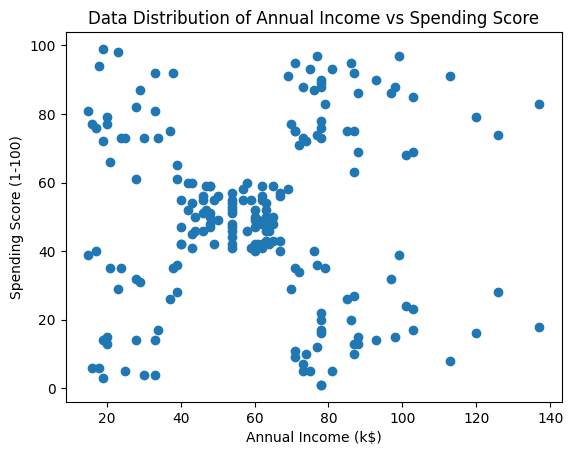

In [2]:
# Selecting relevant features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Visualize data distribution
import matplotlib.pyplot as plt
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Data Distribution of Annual Income vs Spending Score")
plt.show()


K-means Silhouette Score: 0.553931997444648


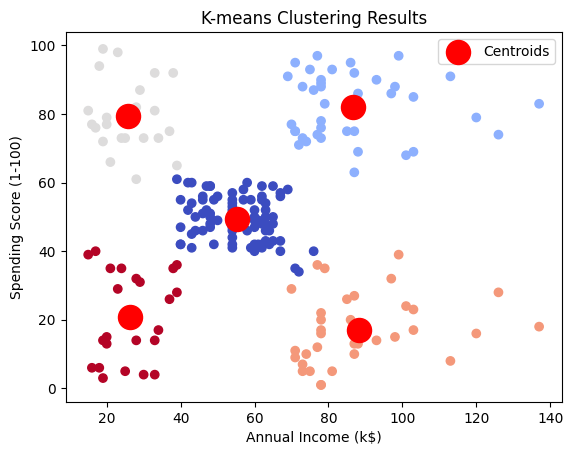

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Applying K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Evaluate K-means clustering
print("K-means Silhouette Score:", silhouette_score(X, kmeans_labels))

# Visualize K-means clustering results
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans_labels, cmap='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-means Clustering Results")
plt.legend()
plt.show()


DBSCAN Silhouette Score: 0.1135163893571667


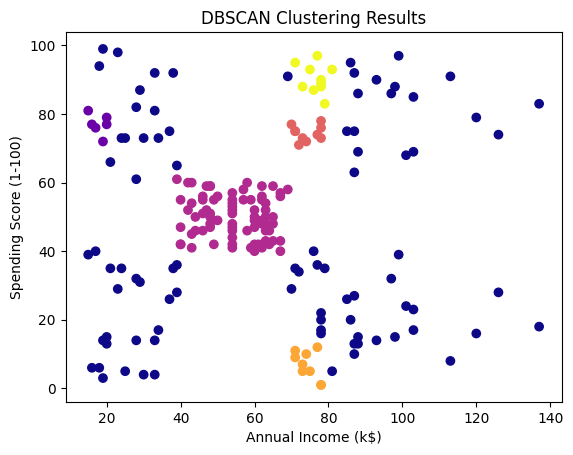

In [7]:
from sklearn.cluster import DBSCAN
import numpy as np

# Applying DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=5)  # Adjust `eps` and `min_samples` for optimal clustering
dbscan_labels = dbscan.fit_predict(X)

# Check if DBSCAN identified more than one cluster
if len(set(dbscan_labels)) > 1:
    # Evaluate DBSCAN with silhouette score if more than one cluster
    print("DBSCAN Silhouette Score:", silhouette_score(X, dbscan_labels))
else:
    print("DBSCAN could not identify more than one cluster with the current parameters.")

# Visualize DBSCAN clustering results
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=dbscan_labels, cmap='plasma')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering Results")
plt.show()


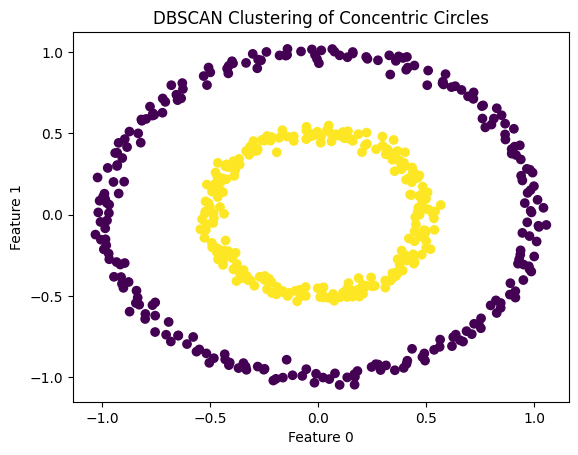

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import numpy as np

# Create a concentric circle dataset
X, _ = make_circles(n_samples=500, factor=.5, noise=.03, random_state=4)

# Apply DBSCAN to the dataset
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering of Concentric Circles")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [ ]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Evaluate K-means clustering
print("K-means Silhouette Score:", silhouette_score(X, kmeans_labels))
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering of Concentric Circles")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [2]:
from sklearn.decomposition import PCA
import numpy as np
# Sample data
X = np.random.rand(100, 5)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Output
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.26719359 0.20579763]
